Keval Shah

60009220061

ML2 Lab8

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])

X: [5.1 3.5 1.4 0.2]


In [3]:
target_names = iris.target_names

In [4]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [5]:
pca = PCA()
pca_transformed = pca.fit_transform(X_scaled)

In [6]:
print("Pca transformed: ", pca_transformed[0])

Pca transformed:  [-0.63070293  0.10757791  0.0187191  -0.00730695]


PCA transformed:  [-0.63070293  0.10757791  0.0187191  -0.00730695]


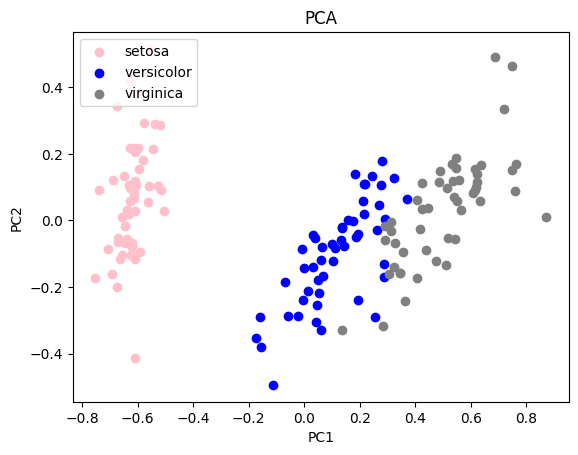

In [7]:
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['pink', 'blue', 'grey']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=target_name)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

pca = PCA()
pca_transformed = pca.fit_transform(X_scaled)
print("PCA transformed: ", pca_transformed[0])
plot3clusters(pca_transformed[:, :2], 'PCA', 'PC')

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [18]:
input_dim = X_scaled.shape[1]
encoding_dim = 2
input_img = Input(shape=(input_dim,))

In [9]:
input_dim = X_scaled.shape[1]
encoding_dim = 2

In [10]:
input_img = Input(shape=(input_dim,))

In [11]:
encoded = Dense(encoding_dim,activation='sigmoid')(input_img)

In [12]:
decoded = Dense(input_dim,activation='sigmoid')(encoded)

In [13]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse')
print(autoencoder.summary())
history = autoencoder.fit(X_scaled,X_scaled,epochs=2000,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

None


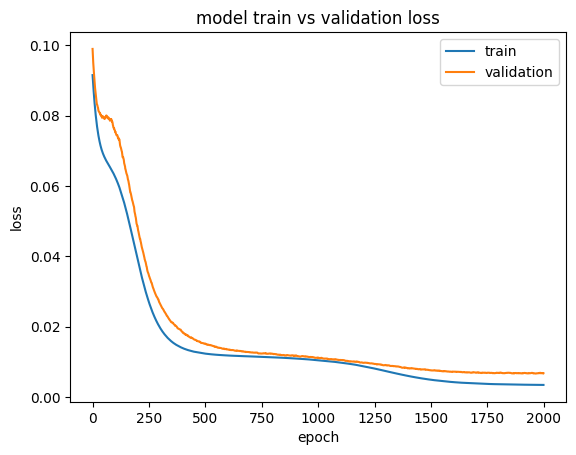

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [15]:
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


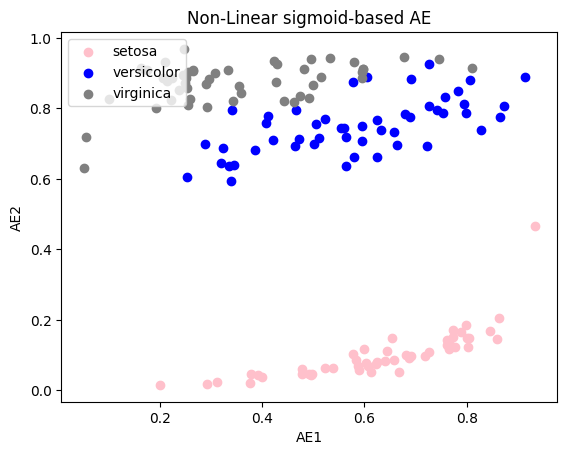

In [23]:
plot3clusters(encoded_data[:,:2],'Non-Linear sigmoid-based AE','AE')

In [19]:
# Sigmoid-based Autoencoder
encoded_sigmoid = Dense(encoding_dim, activation='sigmoid')(input_img)
decoded_sigmoid = Dense(input_dim, activation='sigmoid')(encoded_sigmoid)
autoencoder_sigmoid = Model(input_img, decoded_sigmoid)
autoencoder_sigmoid.compile(optimizer='adam', loss='mse')
history_sigmoid = autoencoder_sigmoid.fit(X_scaled, X_scaled, epochs=2000, batch_size=16, shuffle=True, validation_split=0.1, verbose=0)

In [20]:
# Linear Autoencoder (no activation function)
encoded_linear = Dense(encoding_dim)(input_img)  # No activation for linear
decoded_linear = Dense(input_dim)(encoded_linear)
autoencoder_linear = Model(input_img, decoded_linear)
autoencoder_linear.compile(optimizer='adam', loss='mse')
history_linear = autoencoder_linear.fit(X_scaled, X_scaled, epochs=2000, batch_size=16, shuffle=True, validation_split=0.1, verbose=0)

In [21]:
encoded_relu = Dense(encoding_dim, activation='relu')(input_img)
decoded_relu = Dense(input_dim, activation='sigmoid')(encoded_relu)
autoencoder_relu = Model(input_img, decoded_relu)
autoencoder_relu.compile(optimizer='adam', loss='mse')
history_relu = autoencoder_relu.fit(X_scaled, X_scaled, epochs=2000, batch_size=16, shuffle=True, validation_split=0.1, verbose=0)

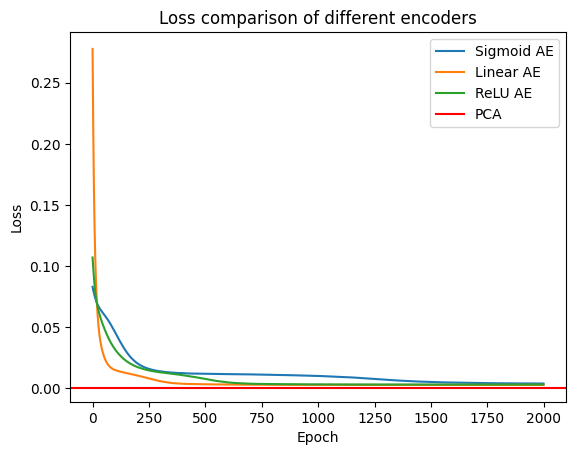

In [22]:
plt.figure()

pca_loss = np.sum((X_scaled - pca.inverse_transform(pca_transformed)) ** 2, axis=1).mean()

plt.plot(history_sigmoid.history['loss'], label='Sigmoid AE')
plt.plot(history_linear.history['loss'], label='Linear AE')
plt.plot(history_relu.history['loss'], label='ReLU AE')

plt.axhline(y=pca_loss, color='r', linestyle='-', label='PCA')

plt.title('Loss comparison of different encoders')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

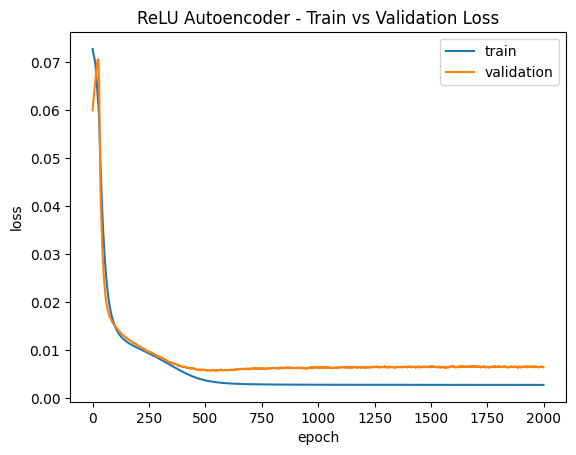

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


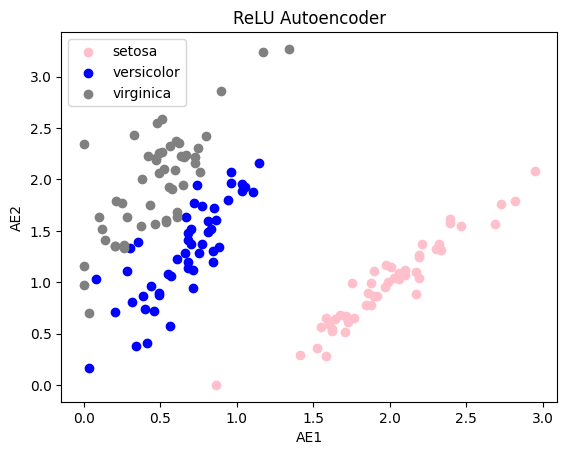

In [17]:
# ReLU-based Non-Linear Autoencoder
encoded_relu = Dense(encoding_dim, activation='relu')(input_img)
decoded_relu = Dense(input_dim, activation='sigmoid')(encoded_relu)

autoencoder_relu = Model(input_img, decoded_relu)
autoencoder_relu.compile(optimizer='adam', loss='mse')
history_relu = autoencoder_relu.fit(X_scaled, X_scaled, epochs=2000, batch_size=16, shuffle=True, validation_split=0.1, verbose=0)

plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('ReLU Autoencoder - Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

encoder_relu = Model(input_img, encoded_relu)
encoded_data_relu = encoder_relu.predict(X_scaled)
plot3clusters(encoded_data_relu[:, :2], 'ReLU Autoencoder', 'AE')


## Conclusion

In this experiment, we compared different encoding techniques on the Iris dataset:
- **PCA**: A linear method that efficiently reduces dimensionality but is limited to linear relationships.
- **Linear Autoencoder**: Performs similarly to PCA but can capture more flexible data reconstructions.
- **Sigmoid-based Autoencoder**: Handles non-linear patterns but is prone to vanishing gradients.
- **ReLU-based Autoencoder**: Avoids vanishing gradients and captures complex relationships better than the Sigmoid-based Autoencoder.

## Applications

- **Dimensionality Reduction**: Improves computational efficiency and visualization.
- **Data Compression**: Reduces data size without losing important features.
- **Anomaly Detection**: Identifies outliers based on reconstruction errors.
- **Image Denoising**: Removes noise using non-linear autoencoders.
- **Feature Engineering**: Encoded data can enhance model performance.
